# 02_eda.ipynb

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Load processed data
reviews_df = pd.read_csv('../data/processed/reviews.csv')
movies_df = pd.read_csv('../data/processed/movie_details.csv')

In [3]:
# Generate summary statistics
reviews_summary = reviews_df.describe(include='all')
movies_summary = movies_df.describe(include='all')

In [7]:
# Display summary statistics
print("Reviews Summary Statistics:")
print(reviews_summary)


Reviews Summary Statistics:
       review_date   movie_id        user_id is_spoiler  \
count       573385     573385  573385.000000     573385   
unique        7104       1572            NaN          2   
top     2003-12-17  tt0468569            NaN      False   
freq           355       4820            NaN     422529   
mean           NaN        NaN  121528.324953        NaN   
std            NaN        NaN   75297.850018        NaN   
min            NaN        NaN       0.000000        NaN   
25%            NaN        NaN   56297.000000        NaN   
50%            NaN        NaN  118306.000000        NaN   
75%            NaN        NaN  183566.000000        NaN   
max            NaN        NaN  263164.000000        NaN   

                                              review_text         rating  \
count                                              573385  573385.000000   
unique                                             573385            NaN   
top     Both of my kids got bored w

In [6]:
print("Movies Summary Statistics:")
print(movies_summary)

Movies Summary Statistics:
         movie_id                                       plot_summary  \
count        1572                                               1572   
unique       1572                                               1572   
top     tt0105112  Former CIA analyst, Jack Ryan is in England wi...   
freq            1                                                  1   
mean          NaN                                                NaN   
std           NaN                                                NaN   
min           NaN                                                NaN   
25%           NaN                                                NaN   
50%           NaN                                                NaN   
75%           NaN                                                NaN   
max           NaN                                                NaN   

        duration                              genre       rating release_date  \
count       1572           

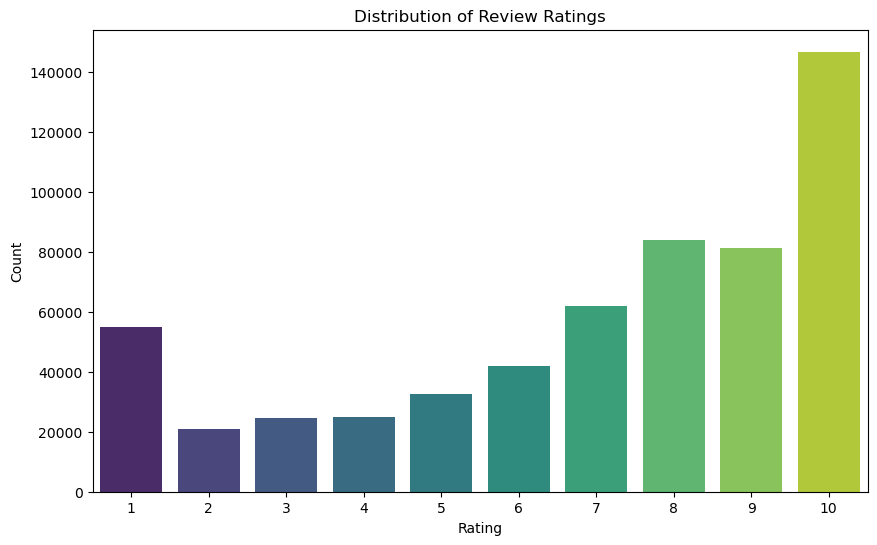

In [8]:
# Plot review distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=reviews_df, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

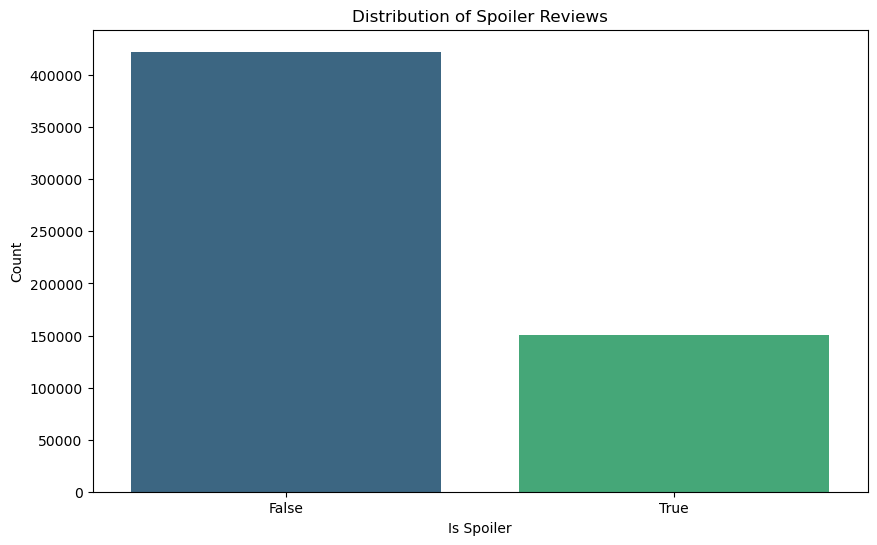

In [9]:
# Plot spoiler distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_spoiler', data=reviews_df, palette='viridis')
plt.title('Distribution of Spoiler Reviews')
plt.xlabel('Is Spoiler')
plt.ylabel('Count')
plt.show()

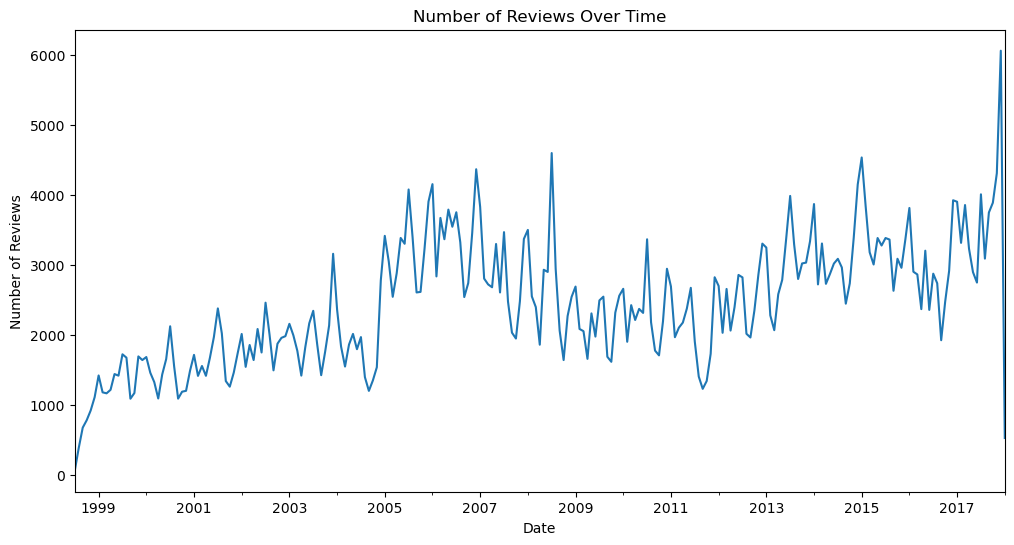

In [12]:
# Plot reviews over time
plt.figure(figsize=(12, 6))
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])  # Ensure review_date is datetime
reviews_df.set_index('review_date').resample('M').size().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


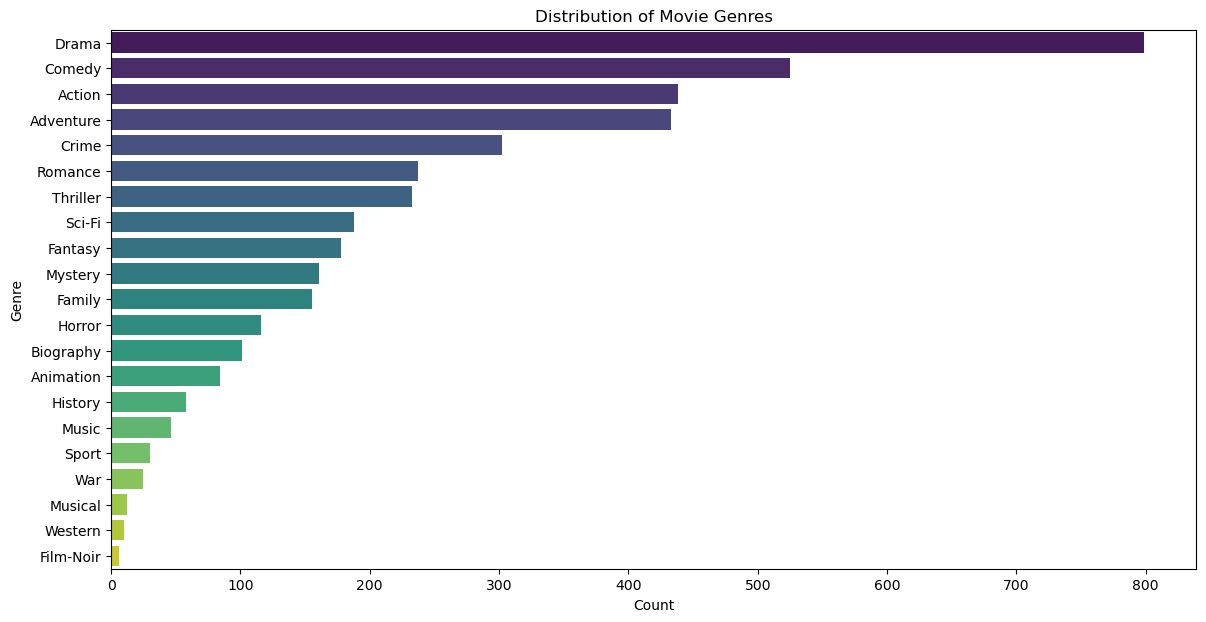

In [80]:
# Create a list of genres
genres_list = list(set([a.replace("'", "").replace(" ", "") for b in movies_df.genre.str.strip('[]').str.split(',') for a in b]))

# Count occurrences of each genre
genre_counts = {}
for genre in genres_list:
    genre_counts[genre] = movies_df['genre'].apply(lambda x: genre in x).sum()

# Create a DataFrame from genre_counts
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Plot genre distribution
plt.figure(figsize=(14, 7))
sns.barplot(x='Count', y='Genre', data=genre_counts_df.sort_values(by='Count', ascending=False), palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()